## 📦 Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## 📁 Loading the Dataset
Load the review dataset

Preview the data structure


In [2]:
# 2. Load and clean data
df = pd.read_csv("flipkart_data.csv")
df = df[['review', 'rating']].dropna()

## 🧼 Data Preprocessing
Convert text to lowercase

Remove punctuation and special characters

Remove stopwords

Lemmatize words

In [3]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_reviews(df):
    df['review'] = df['review'].fillna('').str.lower()
    df['review'] = df['review'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
    df['review'] = df['review'].apply(lambda x: ' '.join(
        stemmer.stem(word) for word in x.split() if word not in stop_words
    ))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    return df

df_cleaned = preprocess_reviews(df)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


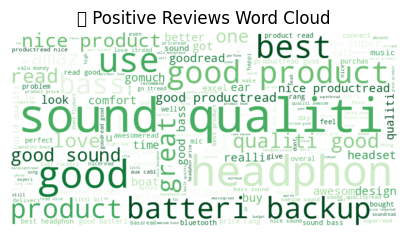

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


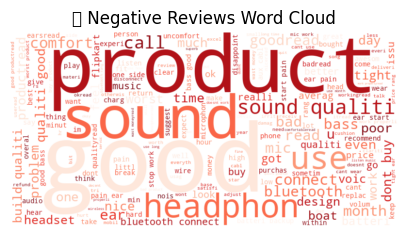

In [4]:
# 4. WordClouds
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
negative_reviews = df_cleaned[df_cleaned['sentiment'] == 0]['review']

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('✅ Positive Reviews Word Cloud')
plt.show()

wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('❌ Negative Reviews Word Cloud')
plt.show()

## 🔢 Feature Extraction (TF-IDF)
Convert cleaned text into numerical vectors using TF-IDF

Capture importance of each word

In [5]:
# 5. Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(df_cleaned['review'])
y = df_cleaned['sentiment']

## ✂️ Splitting Dataset
Split data for training and testing

In [6]:
# 6. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Model Training with Naive Bayes
Train the Naive Bayes model on training data

In [7]:
# 7. Train models
nb_model = MultinomialNB(alpha=0.3)
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

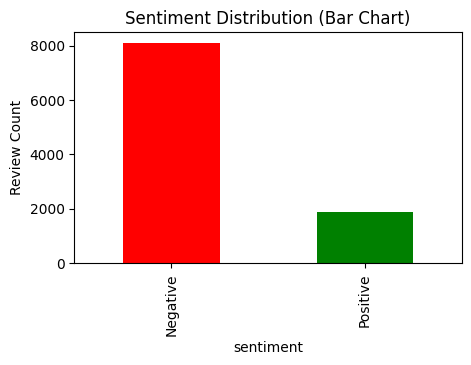

In [8]:
# 8. Plot: Sentiment Distribution (Bar)
plt.figure(figsize=(5, 3))
df_cleaned['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.title("Sentiment Distribution (Bar Chart)")
plt.ylabel("Review Count")
plt.show()

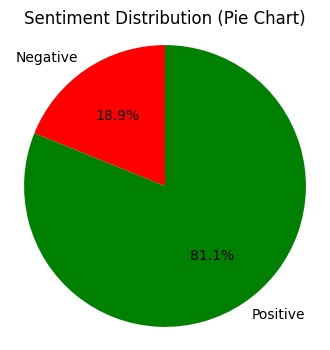

In [9]:
# 9. Plot: Pie Chart
labels = ['Negative', 'Positive']
sizes = df_cleaned['sentiment'].value_counts().sort_index()
colors = ['red', 'green']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Sentiment Distribution (Pie Chart)")
plt.axis('equal')
plt.show()

## 📊 Model Evaluation
Evaluate with confusion matrix and classification report

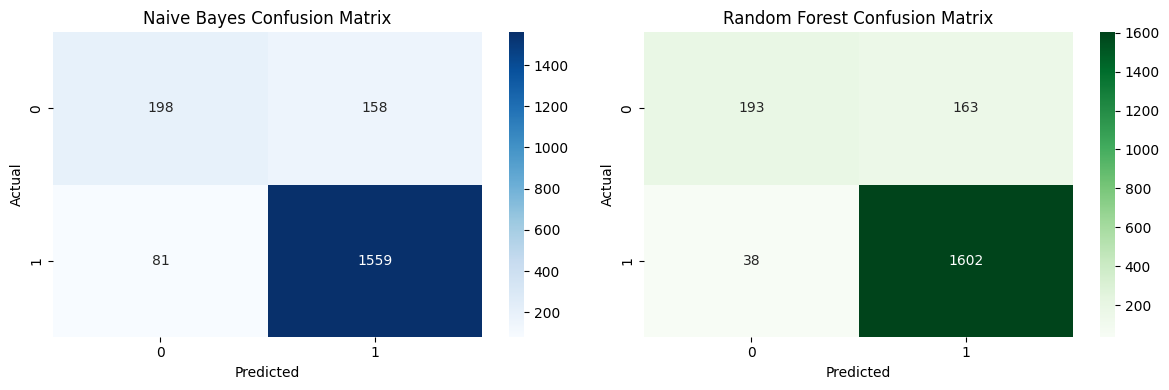

In [10]:
# 10. Confusion Matrices: Heatmaps
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Naive Bayes Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

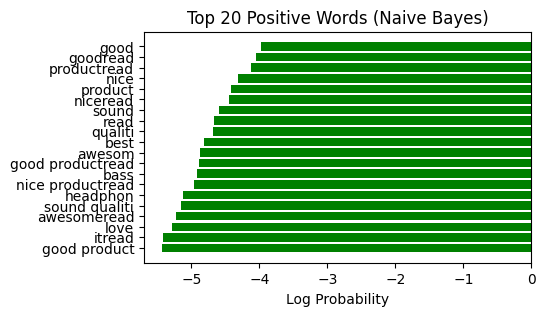

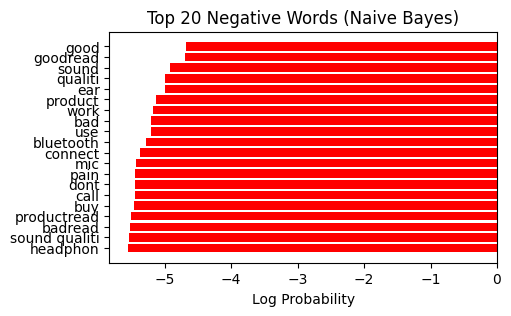

In [11]:
# 11. Important Words for Naive Bayes
feature_names = vectorizer.get_feature_names_out()
log_probs = nb_model.feature_log_prob_

top_positive = np.argsort(log_probs[1])[-20:]
top_negative = np.argsort(log_probs[0])[-20:]

plt.figure(figsize=(5, 3))
plt.barh([feature_names[i] for i in top_positive], log_probs[1][top_positive], color='green')
plt.title("Top 20 Positive Words (Naive Bayes)")
plt.xlabel("Log Probability")
plt.show()

plt.figure(figsize=(5, 3))
plt.barh([feature_names[i] for i in top_negative], log_probs[0][top_negative], color='red')
plt.title("Top 20 Negative Words (Naive Bayes)")
plt.xlabel("Log Probability")
plt.show()

## MODEL PERFORMANCE

In [12]:
# 12. Final Summary (at the end)
print("Final Accuracy Summary:")
print(f"✅ Naive Bayes Accuracy       : {accuracy_nb:.4f}")
print(f"🌲 Random Forest Accuracy     : {accuracy_rf:.4f}")

Final Accuracy Summary:
✅ Naive Bayes Accuracy       : 0.8803
🌲 Random Forest Accuracy     : 0.8993
